# Import the libraries and load the MNIST dataset

### Traning samples: 60000       |              Testing samples: 10000 

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.layers import Flatten, Dense, Conv2D 
from tensorflow.keras.layers import MaxPooling2D, Dropout 
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Importing the MNIST dataset from keras library
data = tf.keras.datasets.mnist

In [3]:
# Splitting the MNIST dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = data.load_data()

# Preprocess the data

In [6]:
# Checking the values of each pixel of any random index before normalising the training set
print(x_train[67])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  68  45 131 131 131 101  68  92
   44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   19 170   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 112  89   0
   40 222   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 25

In [7]:
# Checking maximum value of the channel to know if images are in gray level
x_train.max()

255

In [8]:
# Normalizing 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [9]:
# Checking the values of each pixel after normalizing the sets
print(x_test[67])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
# Checking the shape of the data sets
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
# In order to make images 4D, we need to reshape them
# Reshaping image in order to suit it for convolution operation
input_shape = [28, 28, 1]
x_train = x_train.reshape(len(x_train), input_shape[0], input_shape[1], input_shape[2])
x_test = x_test.reshape(len(x_test), input_shape[0], input_shape[1], input_shape[2])

In [12]:
# Checking the shape of the data sets after reshaping
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Create the model

In [13]:
# Creating a neural network
model = Sequential()

# First CNN layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Second CNN layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third CNN layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layers 
model.add(Flatten())
model.add(Dropout(0.5)) #Regularizing
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# Summarizing the performance of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [14]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model 

In [15]:
# Training the model
history = model.fit(x_train, y_train, batch_size=10, epochs=15, validation_data=(x_test, y_test), validation_split=0.3)

Epoch 1/15
4200/4200 [==============================] - 57s 13ms/step - loss: 0.3051 - accuracy: 0.9035 - val_loss: 0.0739 - val_accuracy: 0.9780
Epoch 2/15
4200/4200 [==============================] - 55s 13ms/step - loss: 0.1178 - accuracy: 0.9644 - val_loss: 0.0522 - val_accuracy: 0.9847
Epoch 3/15
4200/4200 [==============================] - 56s 13ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 4/15
4200/4200 [==============================] - 54s 13ms/step - loss: 0.0734 - accuracy: 0.9779 - val_loss: 0.0545 - val_accuracy: 0.9847
Epoch 5/15
4200/4200 [==============================] - 54s 13ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 6/15
4200/4200 [==============================] - 59s 14ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 7/15
4200/4200 [==============================] - 59s 14ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0383 -

# Save the model

In [16]:
# Saving our trained model
model.save('Handwritten.keras')
print("Model is saved successfully.")

Model is saved successfully.


# Evaluate the model using MNIST test samples

In [17]:
performance = model.evaluate(x_test, y_test, verbose=0)
loss = performance[0]
accuracy = performance[1]
print("[LOSS]: ",loss)
print("[ACCURACY]: ",accuracy)

[LOSS]:  0.03052486851811409
[ACCURACY]:  0.9919000267982483


In [18]:
# Prediction
prediction = model.predict(x_test)

In [19]:
# Predicting taking random index inputs
predictionMax = np.argmax(prediction[127])

print(predictionMax)

5


It's a  5


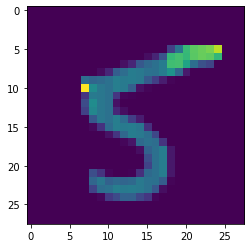

In [20]:
# Checking whether the O/P is correct or not by plotting the image at index 127
plt.imshow(x_test[127])
print("It's a ",predictionMax)